# Practice: Working with time series data 

In this practice assignment, you will test and review the pandas fundamentals including: 

- open csv files containing a time series 
- perform grouping and aggregation on time series data 
- examine and plot time series data 

We will be using the same weather station data as in the demonstration. 

#### 1) Import pandas and matplotlib

This is similar to how we started our analysis.

#### 2) Use Pandas’ read_csv function to open the dataset and to create a timeindex. 

We want to make sure that dates are parsed and that missing values are replaced with `NaN`



,STATION,ELEVATION,LATITUDE,LONGITUDE,PRCP,SNWD,SNOW,TAVG,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5
DATE,,,,,,,,,,,,,,,
1956-01-01,GHCND:USW00093736,194.8,38.14,-78.45,NaN,NaN,NaN,NaN,10.0,-1.7,NaN,NaN,NaN,NaN,NaN
1956-01-02,GHCND:USW00093736,194.8,38.14,-78.45,NaN,NaN,NaN,NaN,4.4,-3.9,NaN,NaN,NaN,NaN,NaN
1956-01-03,GHCND:USW00093736,194.8,38.14,-78.45,NaN,NaN,NaN,NaN,12.8,0.6,NaN,NaN,NaN,NaN,NaN
1956-01-04,GHCND:USW00093736,194.8,38.14,-78.45,NaN,NaN,NaN,NaN,8.9,-2.8,NaN,NaN,NaN,NaN,NaN
1956-01-05,GHCND:USW00093736,194.8,38.14,-78.45,NaN,NaN,NaN,NaN,11.7,0.0,NaN,NaN,NaN,NaN,NaN


#### 3) Getting a basic overview of the data 

- Use `.info()` to learn more about the columns
- Use `.describe()` to get basic descriptive statistics 

#### 4) Remove all columns except `TMAX`, `TMIN`, `PRCP`

For now, we will only work with the temperature and precipitation columns. Let's remove the rest. Hint, we can simply select the columns that we want to keep using a list and then save these to the dataframe object. 

The code below will only retain the TMAX columns
`df = df[['TMAX']]`

#### 5) Construct a climate diagram. 

We can use aggregation functions to construct a climate diagram from the data. We won't be able to fully recreate this figure, but we can replicate all the functionality

![](../Assets/ClimateDiagram_Charlottesville.png)

#### 5 a) Save a 30-year periods to a new dataframe

Climate data is typically aggregated for 30 year periods. Let's take the most recent climate period: 1991 to 2010 and save this data to a new dataframe called

`df_30years`

,TMAX,TMIN,PRCP
DATE,,,
1991-01-01,2.2,-5.6,0.0
1991-01-02,11.1,-7.2,0.0
1991-01-03,9.4,-3.9,0.0
1991-01-04,6.7,-2.2,0.0
1991-01-05,6.7,-5.0,0.0
...,...,...,...
2010-12-27,3.3,-2.1,0.0
2010-12-28,8.9,-4.3,0.0
2010-12-29,10.0,-2.7,0.0


#### 5 b) Check the data for gaps 

We we need to understand whether we have missing data. We have encountered several ways to do so. 

<class 'pandas.DataFrame'>
DatetimeIndex: 7303 entries, 1991-01-01 to 2010-12-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TMAX    7301 non-null   float64
 1   TMIN    7301 non-null   float64
 2   PRCP    7284 non-null   float64
dtypes: float64(3)
memory usage: 228.2 KB


#### 5 c) Gapfill the data

We don't know what the best way to do this is, but for now let's use a simple linear interpolation using `.interpolate()`. \

In reality this would likely not be a good choice. 

#### 5 c) Aggregate the data by month using `.groupby`.

Next, we want to create the monthly aggregation. For the temperatures `TMIN`, `TMAX`, we want to find the monthly mean. For rainfall `PRCP` we want to have the monthly sum. 

Note: If you aggregate the `PRCP` column with sum, you will need to divide the result by 30, because we have 30 years of data. 



,TMAX,TMIN,PRCP
DATE,,,
1,7.686452,-2.426452,52.390000
2,9.362655,-1.754336,38.423333
3,14.298548,1.946613,55.703333
4,20.458932,6.981302,47.636667
5,24.118226,11.379677,57.953333
6,28.676000,16.489167,64.413333
7,30.585000,18.842097,66.538333
8,30.048871,18.165484,49.076667
9,26.154758,13.969449,76.600000


#### Create a plot. 

We can now plot the data using subplots. Plot the temperature data as lines on the top-panel and the precipitation as bars on the bottom panel. Add titles, and labels to the figure

The command below will create a subplot with a top and a bottom panel. 
`fig, ax = plt.subplots(2,1)`

The top panel can be specified in the plot command like this: 
`df.plot(..., ax = ax[0], ...)`

<Axes: xlabel='Month', ylabel='Precipitation (mm)'>

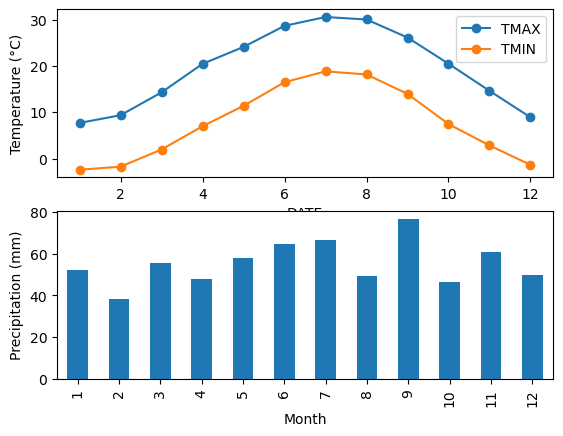

#### 7) Analyze hot days 

Often times we are more interested in extremes compared to the climatology. For example, negative health effects (and especially for vulnerable populations) are linked to heat stress. 

Hot days with temperatures exceeding 35 degrees Celsius (95 ^o^F) and hot nights with temperatures exceeding 27 degrees (~80 ^o^F) can contribute to heat exhaustion. 

So let's analyze whether the number of hot days has changed over time. 

#### 7 a) Create data columns for hot days and nights

Add 3 columns to the dataframe. 

- The 'hot_day' column should be `True` for days with maximum temperatures greater than 35 degrees Celsius.
- The 'hot_night' column should be `True` for days when the minimum temperature remains above 27 degrees Celsius.
- The 'hot_day_and_night' column should be `True` for days with both hot days and hot nights. 


You can compare two series using the `&` symbol. See the example below: 

0    False
1     True
2    False
3    False
4    False
dtype: bool

,TMAX,TMIN,PRCP,hot_day,hot_night,hot_day_and_night
DATE,,,,,,
1956-01-01,10.0,-1.7,NaN,False,False,False
1956-01-02,4.4,-3.9,NaN,False,False,False
1956-01-03,12.8,0.6,NaN,False,False,False
1956-01-04,8.9,-2.8,NaN,False,False,False
1956-01-05,11.7,0.0,NaN,False,False,False


#### 7 b) Aggregate the heat data to yearly counts. 

Save the newly created columns to a dataframe called `df_heat` and resample the data to yearly sums. Recall, that this will produce a count of all the `True` values that are aggregated.


,hot_day,hot_night,hot_day_and_night
DATE,,,
1956-01-01,4,7,1
1957-01-01,7,16,3
1958-01-01,0,2,0
1959-01-01,4,4,4
1960-01-01,1,1,0
...,...,...,...
2022-01-01,6,0,0
2023-01-01,11,0,0
2024-01-01,15,2,1


#### 7 b) Visualize the data

Create a plot that shows the number of days with heat over the period. 

<Axes: title={'center': 'Number of hot days and nights per year'}, xlabel='DATE', ylabel='Number of days'>

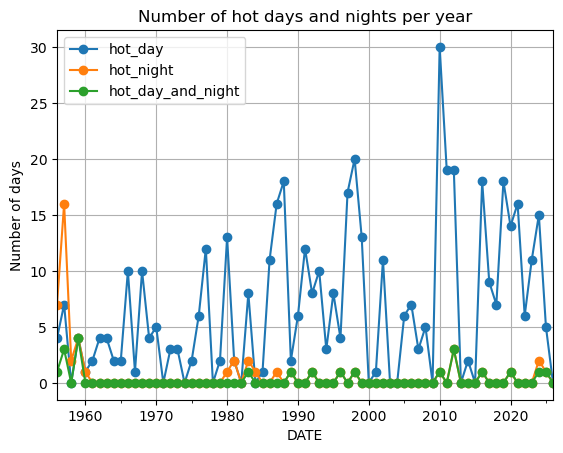